In [1]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras.models import *

In [2]:
file = zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/Sign-Minst/sign_mnist_train.csv.zip", "r")
file.extractall()
file.close()

In [3]:
df = pd.read_csv("/content/sign_mnist_train.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [4]:
x = df.drop("label", axis = 1)
y = df["label"]

In [13]:
len(y.unique())

24

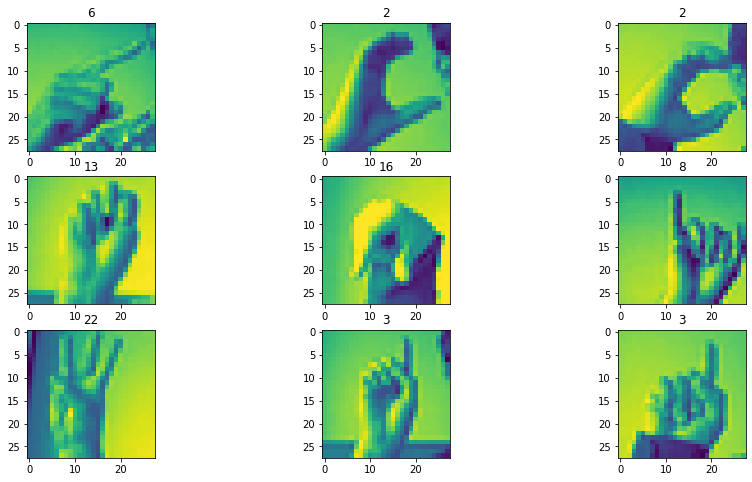

In [5]:
plt.figure(figsize = (15, 8))

for i in range(1, 10):
  plt.subplot(3, 3, i)
  plt.imshow(x.iloc[i, :].values.reshape(28, 28))
  plt.title(y[i])

In [6]:
from sklearn.model_selection import train_test_split 

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state= 143, shuffle = True)

In [8]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((20591, 784), (6864, 784), (20591,), (6864,))

In [9]:
xtrain = xtrain.values.reshape(xtrain.shape[0], 28, 28, 1)
xtest = xtest.values.reshape(xtest.shape[0], 28, 28, 1)
ytrain = np.array(pd.get_dummies(ytrain))
ytest = np.array(pd.get_dummies(ytest))

In [14]:
def createModel():
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding= 'same', activation='relu',
                    input_shape = (28,28,1)))
    model.add(Conv2D(32, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(24, activation="softmax"))
    
    return model

model = createModel()
batch_size = 256
epochs = 10
model.compile(optimizer='adam', loss='categorical_crossentropy',
             metrics = ['accuracy'])
    

In [15]:
history = model.fit(xtrain, ytrain, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data=(xtest, ytest))
model.evaluate(xtest, ytest)

Epoch 1/10
81/81 [==============================] - 12s 27ms/step - loss: 3.3932 - accuracy: 0.0519 - val_loss: 3.0663 - val_accuracy: 0.1199
Epoch 2/10
81/81 [==============================] - 2s 19ms/step - loss: 2.5828 - accuracy: 0.1910 - val_loss: 1.6712 - val_accuracy: 0.5130
Epoch 3/10
81/81 [==============================] - 2s 20ms/step - loss: 1.6252 - accuracy: 0.4464 - val_loss: 0.7094 - val_accuracy: 0.7807
Epoch 4/10
81/81 [==============================] - 2s 19ms/step - loss: 0.9732 - accuracy: 0.6644 - val_loss: 0.2864 - val_accuracy: 0.9327
Epoch 5/10
81/81 [==============================] - 2s 21ms/step - loss: 0.5949 - accuracy: 0.7927 - val_loss: 0.1683 - val_accuracy: 0.9575
Epoch 6/10
81/81 [==============================] - 2s 21ms/step - loss: 0.3832 - accuracy: 0.8667 - val_loss: 0.0449 - val_accuracy: 0.9929
Epoch 7/10
81/81 [==============================] - 2s 19ms/step - loss: 0.2586 - accuracy: 0.9147 - val_loss: 0.0220 - val_accuracy: 0.9945
Epoch 8/10
8

[0.00277662998996675, 0.9997086524963379]